# Рекомендация тарифов

Даны данные о поведении клиентов, которые уже перешли на новые тарифы (из проекта курса «Статистический анализ данных»). 

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
- `сalls` — количество звонков,
- `minutes` — суммарная длительность звонков в минутах,
- `messages` — количество sms-сообщений,
- `mb_used` — израсходованный интернет-трафик в Мб,
- `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится.

Необходимо модель с максимально большим значением *accuracy* (не менее 0.75).

## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
users = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
def basic_data_info(data):
    print('Первые пять строк:')
    print(data.head())
    print('\nИнформация:')
    print(data.info())
    print('\nНаличие пропусков:')
    print(data.isna().sum())
    print('\nНаличие дубликатов:')
    print(data.duplicated().sum())
    print('\nСтатистическое описание данных:')
    print(data.describe())
    

In [4]:
basic_data_info(users)

Первые пять строк:
   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None

Наличие пропусков:
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Наличие дубликатов:
0

Статистическое описание данных:
             calls      minutes     messages       mb_used     is_ultra
count  3214.0

In [5]:
users['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

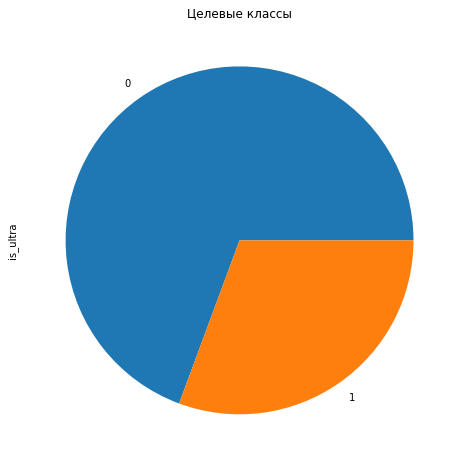

In [6]:
users['is_ultra'].value_counts().plot(kind='pie', figsize=(15,8), title='Целевые классы');

Данные были загружены в датафрейм `users`. Датафрейм содержит 3214 строк. В датафрейме есть 5 колонок. В колонке `is_ultra` содержатся целочисленные значения `int64`, в колонках `calls`, `minutes`, `messages`, `mb_used`- численные значения типа `float64`.<br>
В данных нет пропусков и нет дубликатов.

Целевым классом, по которому будет проводиться классификация, является `is_ultra`, который принимает два значения: 0 и 1. Мы видим, что классы распределены неравномерно: частотность класса **0** более чем в два раза превышает частотность класса **1**.


## Разбейте данные на выборки

Используем функцию `train_test_split` библиотеки `sklearn` 2 раза:
- сначала разобьем данные на обучающую и валидационную+тестовую выборки в отношении 3:2;
- затем разобьем вторую выборку на валидационную и тестовую, также в отношении 1:1.

Таким образом мы получим три выборки, которые будут относится друг к другу в отношении 3:1:1

In [7]:
users_train, users_test_valid = train_test_split(users, test_size=0.4, random_state=1)
users_test, users_valid = train_test_split(users_test_valid, test_size=0.5, random_state=1)

In [8]:
print(users_train.shape)
print(users_test.shape)
users_valid.shape

(1928, 5)
(643, 5)


(643, 5)

Выделим в данных признаки и целевой класс.

In [9]:
users_train_X = users_train.drop('is_ultra', axis=1)
users_test_X = users_test.drop('is_ultra', axis=1)
users_valid_X = users_valid.drop('is_ultra', axis=1)

users_train_y = users_train['is_ultra']
users_test_y = users_test['is_ultra']
users_valid_y = users_valid['is_ultra']

## Исследуйте модели
Перед нами стоит задача классификации. Сравним результаты работы трех моделей:
- дерево решений;
- случайный лес;
- логистическая регрессия;

### Дерево решений
Один из гиперпараметров дерева решений - это `max_depth`. Будем изменять значения `max_depth` от 1 до 10.

In [10]:
best_model_DTC = None
best_result_DTC = 0
best_max_depth = 0
for i in range(1, 11):
    model = DecisionTreeClassifier(max_depth=i, random_state=1)
    model.fit(users_train_X, users_train_y)
    result = model.score(users_valid_X, users_valid_y)
    if result > best_result_DTC:
        best_model_DTC = model
        best_result_DTC = result
        best_max_depth = i

In [11]:
print(f"Accuracy наилучшей модели на валидационной выборке: {best_result_DTC}. Достигается при значении гиперпараметра max_depth = {best_max_depth}", )

Accuracy наилучшей модели на валидационной выборке: 0.7931570762052877. Достигается при значении гиперпараметра max_depth = 6


Итак, дерево решений показывает наилучшее значение метрики *accuracy*, равное 0.79, при значении гиперпараметра `max_depth`, равном 6.

### Случайный лес
У модели  случайного леса предлагается менять гиперпараметр `n_estimators` от 1 до 10.

In [12]:
best_model_RFC = None
best_result_RFC = 0
best_n_estimators = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=1, n_estimators=est) 
    model.fit(users_train_X, users_train_y) 
    result = model.score(users_valid_X, users_valid_y) 
    if result > best_result_RFC:
        best_model_RFC = model 
        best_result_RFC = result 
        best_n_estimators = est

In [13]:
print(f"Accuracy наилучшей модели на валидационной выборке: {best_result_RFC}. Достигается при значении гиперпараметра n_estimators = {best_n_estimators}", )

Accuracy наилучшей модели на валидационной выборке: 0.8009331259720062. Достигается при значении гиперпараметра n_estimators = 10


Модель случайного леса демонстрирует наилучшее качество ($accuracy = 0.8$) при значении гиперпараметра `n_estimators`, равном 10. Также эта модель показывает лучшее качество по сравнению с моделью DecisionTreeClassifier.

### Логистическая регрессия
Обучим модель логистической регрессии. Будем замерять качество при разных значениях гиперпараметра `max_iter`.

In [14]:
best_model_LR = None
best_result_LR = 0
best_max_iter = 0
for i in [100, 500, 1000]:
    model = LogisticRegression(random_state=1, solver='lbfgs', max_iter=i)
    model.fit(users_train_X, users_train_y) 
    result = model.score(users_valid_X, users_valid_y) 
    if result > best_result_LR:
        best_model_LR = model 
        best_result_LR = result 
        best_max_iter = i

In [15]:
print(f"Accuracy наилучшей модели на валидационной выборке: {best_result_LR}. Достигается при значении гиперпараметра max_iter = {best_max_iter}", )

Accuracy наилучшей модели на валидационной выборке: 0.7558320373250389. Достигается при значении гиперпараметра max_iter = 100


Наилучшее качество логистическая регрессия показала при значении `max_iter` = 100. Метрика *accuracy* достигла значения 0.76.

### Исследование моделей: выводы
Наилучшее качество продемонстрировала модель случайного леса со значением гиперпараметра `n_estimators` = 10. Значение метрики *accuracy* на валидационной выборке равно 0.8.

Второй моделью по качеству стала модель DecisionTreeClassifier: она продемонстрировала *accuracy* = 0.79 при `max_depth` = 6.

Третьей по качеству оказалась модель логистической регрессии с *accuracy* = 0.76 при значении гиперпараметра `max_iter` = 100 (дефолтное значение).

## Проверьте модель на тестовой выборке
Проверим качество нашей лучшей модели (случайный лес) на тестовой выборке.

In [16]:
result_test = best_model_RFC.score(users_test_X, users_test_y)

In [17]:
print(f'Accuracy лучшей модели RandomForestClassifier на тестовой выборке: {result_test}')

Accuracy лучшей модели RandomForestClassifier на тестовой выборке: 0.7807153965785381


Итак, модель случайного леса демонстрирует приемлемое значение метрики *accuracy* на тестовой выборке: $accuracy = 0.78$.

## (бонус) Проверьте модели на адекватность
На этапе изучения данных, мы увидели, что классы распределены неравномерно: класс **0** встречается чаще, чем класс **1**, более чем в два раза. Можно проверить, что наша модель работает лучше, чем модель, которая всегда бы предсказывала самый частотный класс.

In [18]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(users_train_X, users_train_y)
print(f'Accuracy DummyClassifier на тестовой выборке: {dummy_clf.score(users_test_X, users_test_y)}')

Accuracy DummyClassifier на тестовой выборке: 0.6640746500777605


Получаем, что *accuracy* DummyClassifier-а ниже, чем качество выбранной нами модели случайного леса, т.е. выбранная нами модель проходит проверку на адекватность.

Также мы можем посмотреть на важность признаков, по которым случайный лес делает классификацию.

In [19]:
importances = best_model_RFC.feature_importances_


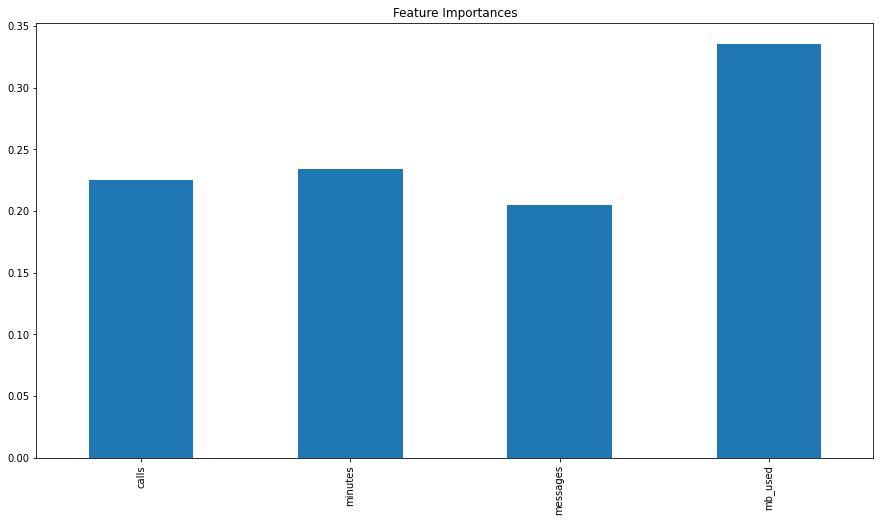

In [20]:
importances = pd.Series(importances, index=users_train_X.columns)
importances.plot.bar(figsize=(15,8), title='Feature Importances');


Если бы у нас было больше информации о тарифах, то интерпретация важности признаков могла бы помочь оценить адекватность модели: например, если бы мы знали, что один из тарифов имеет более выгодные условия с точки зрения расхода интернет-трафика, то более высокая важноть этого признака была бы легко объяснима.

## Выводы
Мы проанализировали данные о поведении клиентов оператора мобильной связи и предложили модель классификации, которая помогает выбрать подходящий тариф. Для выполнения этой задачи были пройдены следующие этапы:
1. Загрузка и изучение данных. Данные были загружены в датафрейм `users`, содержащий 3214 строк и 5 колонок. В колонке `is_ultra` содержатся целочисленные значения `int64`, в колонках `calls`, `minutes`, `messages`, `mb_used`- численные значения типа `float64`.<br>
В данных нет пропусков и нет дубликатов.
Было обнаружено, что целевые классы `is_ultra` в данных распределены неравномерно: частотность класса **0** более чем в два раза превышает частотность класса **1**.


2. Данные были разбиты на три выборки: обучающую, валидационную и тестовую в соотношении 3:1:1. Объем выборок получился 1928, 643 и 643 наблюдения соответственно. 


3. Было рассмотрено три классификатора:
    - решающее дерево (DecisionTreeClassifier). Мы варьировали значение гиперпараметра `max_depth` от 1 до 10. Модель показала наилучший результат при `max_depth` = 0: $accuracy = 0.79$ на валидационной выборке.
    - случайный лес (RandomForestClasifier). Были рассмотрены значения гиперпараметра `n_estimators` от 1 до 10. Модель показала наилучший результат $accuracy = 0.8$ на валидационной выборке при `n_estimators` = 10.
    - логистическая регрессия (LogisticRegression). Наилучшее качество логистическая регрессия показала при значении `max_iter` = 100. Метрика *accuracy* достигла значения 0.76.
    
    На основе экспериментов была выбрана модель RandomForestClassifier со значением `n_estimators` = 10.


4. Была выполнена проверка качества выбранной модели на тестовой выборке. Модель продемонстрировала качество $accuracy=0.78$.


5. была выполнена проверка модели на адекватность: мы обучили DummyClassifier, который предсказывал самое частотное значение целевой переменной. Качество такой модели равно $accuracy=0.66$. Таким образом, мы видим, что качество нашей модели выше, чем качество модели, которая предсказывает самое частое значение.